<a href="https://colab.research.google.com/github/sabeelOO6/customer_churn_predict/blob/main/implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = "TelecomChurnInsights.csv"  # Replace with the actual file path
data = pd.read_csv(r"S:\implementation\TelecomChurnInsights.csv")
data.head()
# Get information about the dataset
data.info()

# Summary statistics of numerical features
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     7043 non-null   object 
 1   Gender                         7043 non-null   object 
 2   SeniorCitizen (0: No, 1: Yes)  7043 non-null   int64  
 3   Has_Partner                    7043 non-null   object 
 4   Has_Dependents                 7043 non-null   object 
 5   TenureMonths                   7043 non-null   int64  
 6   Has_PhoneService               7043 non-null   object 
 7   Has_MultipleLines              7043 non-null   object 
 8   InternetServiceType            7043 non-null   object 
 9   Has_OnlineSecurity             7043 non-null   object 
 10  Has_OnlineBackup               7043 non-null   object 
 11  Has_DeviceProtection           7043 non-null   object 
 12  Has_TechSupport                7043 non-null   o

,"SeniorCitizen (0: No, 1: Yes)",TenureMonths,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Remove any leading/trailing spaces from the 'TotalCharges' column, if any
data['TotalCharges'] = data['TotalCharges'].str.strip()

# Convert 'TotalCharges' column to numeric (it will convert non-numeric entries to NaN)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check if there are any NaN values after conversion (this indicates invalid data)
data.isnull().sum()

CustomerID                        0
Gender                            0
SeniorCitizen (0: No, 1: Yes)     0
Has_Partner                       0
Has_Dependents                    0
TenureMonths                      0
Has_PhoneService                  0
Has_MultipleLines                 0
InternetServiceType               0
Has_OnlineSecurity                0
Has_OnlineBackup                  0
Has_DeviceProtection              0
Has_TechSupport                   0
Has_StreamingTV                   0
Has_StreamingMovies               0
ContractType                      0
PaperlessBilling                  0
PaymentMethodType                 0
MonthlyCharges                    0
TotalCharges                     11
Churned                           0
dtype: int64

In [ ]:
# Instead of using inplace=True, assign the result back to the column
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())
data.isnull().sum()


CustomerID                       0
Gender                           0
SeniorCitizen (0: No, 1: Yes)    0
Has_Partner                      0
Has_Dependents                   0
TenureMonths                     0
Has_PhoneService                 0
Has_MultipleLines                0
InternetServiceType              0
Has_OnlineSecurity               0
Has_OnlineBackup                 0
Has_DeviceProtection             0
Has_TechSupport                  0
Has_StreamingTV                  0
Has_StreamingMovies              0
ContractType                     0
PaperlessBilling                 0
PaymentMethodType                0
MonthlyCharges                   0
TotalCharges                     0
Churned                          0
dtype: int64

In [ ]:
# STEP 2:

# DATA CLEANING

In [ ]:
# Check how many duplicates exist in the dataset
print(f"Number of duplicates: {data.duplicated().sum()}")

# Check the shape before and after dropping duplicates
print(f"Shape before dropping duplicates: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"Shape after dropping duplicates: {data.shape}")

Number of duplicates: 0
Shape before dropping duplicates: (7043, 21)
Shape after dropping duplicates: (7043, 21)


In [ ]:
# Check unique values for each categorical column
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Unique values in {column}: {data[column].unique()}")


Unique values in CustomerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in Gender: ['Female' 'Male']
Unique values in Has_Partner: ['Yes' 'No']
Unique values in Has_Dependents: ['No' 'Yes']
Unique values in Has_PhoneService: ['No' 'Yes']
Unique values in Has_MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetServiceType: ['DSL' 'Fiber optic' 'No']
Unique values in Has_OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in Has_OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in Has_DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in Has_TechSupport: ['No' 'Yes' 'No internet service']
Unique values in Has_StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in Has_StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in ContractType: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMe

In [ ]:
# Standardize columns with "No internet service" to "No"
columns_to_standardize = ['Has_MultipleLines', 'Has_OnlineSecurity', 'Has_OnlineBackup',
                          'Has_DeviceProtection', 'Has_TechSupport', 'Has_StreamingTV',
                          'Has_StreamingMovies']

for col in columns_to_standardize:
    data[col] = data[col].replace({'No internet service': 'No'})
# Standardize "No phone service" to "No" in the relevant column
data['Has_MultipleLines'] = data['Has_MultipleLines'].replace({'No phone service': 'No'})

# Check unique values again
for column in columns_to_standardize:
    print(f"Unique values in {column}: {data[column].unique()}")


Unique values in Has_MultipleLines: ['No' 'Yes']
Unique values in Has_OnlineSecurity: ['No' 'Yes']
Unique values in Has_OnlineBackup: ['Yes' 'No']
Unique values in Has_DeviceProtection: ['No' 'Yes']
Unique values in Has_TechSupport: ['No' 'Yes']
Unique values in Has_StreamingTV: ['No' 'Yes']
Unique values in Has_StreamingMovies: ['No' 'Yes']


In [ ]:
# Standardize text case
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = data[column].str.capitalize()

# Check unique values again to ensure consistency
for column in categorical_columns:
    print(f"Unique values in {column}: {data[column].unique()}")


Unique values in CustomerID: ['7590-vhveg' '5575-gnvde' '3668-qpybk' ... '4801-jzazl' '8361-ltmkd'
 '3186-ajiek']
Unique values in Gender: ['Female' 'Male']
Unique values in Has_Partner: ['Yes' 'No']
Unique values in Has_Dependents: ['No' 'Yes']
Unique values in Has_PhoneService: ['No' 'Yes']
Unique values in Has_MultipleLines: ['No' 'Yes']
Unique values in InternetServiceType: ['Dsl' 'Fiber optic' 'No']
Unique values in Has_OnlineSecurity: ['No' 'Yes']
Unique values in Has_OnlineBackup: ['Yes' 'No']
Unique values in Has_DeviceProtection: ['No' 'Yes']
Unique values in Has_TechSupport: ['No' 'Yes']
Unique values in Has_StreamingTV: ['No' 'Yes']
Unique values in Has_StreamingMovies: ['No' 'Yes']
Unique values in ContractType: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethodType: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Churned: ['No' 'Yes']


In [ ]:
print(data.columns)



Index(['CustomerID', 'Gender', 'SeniorCitizen (0: No, 1: Yes)', 'Has_Partner',
       'Has_Dependents', 'TenureMonths', 'Has_PhoneService',
       'Has_MultipleLines', 'InternetServiceType', 'Has_OnlineSecurity',
       'Has_OnlineBackup', 'Has_DeviceProtection', 'Has_TechSupport',
       'Has_StreamingTV', 'Has_StreamingMovies', 'ContractType',
       'PaperlessBilling', 'PaymentMethodType', 'MonthlyCharges',
       'TotalCharges', 'Churned'],
      dtype='object')


In [ ]:
print(X_train.dtypes)
print(X_train.isnull().sum())
print(X_train.head())

SeniorCitizen (0: No, 1: Yes)      int64
TenureMonths                       int64
MonthlyCharges                   float64
TotalCharges                      object
Has_OnlineSecurity                object
Has_TechSupport                   object
PaperlessBilling                  object
ContractType                      object
PaymentMethodType                 object
dtype: object
SeniorCitizen (0: No, 1: Yes)    0
TenureMonths                     0
MonthlyCharges                   0
TotalCharges                     0
Has_OnlineSecurity               0
Has_TechSupport                  0
PaperlessBilling                 0
ContractType                     0
PaymentMethodType                0
dtype: int64
      SeniorCitizen (0: No, 1: Yes)  TenureMonths  MonthlyCharges  \
2142                              0            21           64.85   
1623                              0            54           97.20   
6074                              0             1           23.45   
1362         

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df =  pd.read_csv(r"S:\implementation\TelecomChurnInsights.csv")   # Ensure you load the dataset properly

# Replace empty strings in TotalCharges with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with MonthlyCharges * TenureMonths
df['TotalCharges'].fillna(df['MonthlyCharges'] * df['TenureMonths'], inplace=True)

# Verify conversion
print(df.dtypes)  # Ensure TotalCharges is float64
print(df.isnull().sum())  # Check for missing values


CustomerID                        object
Gender                            object
SeniorCitizen (0: No, 1: Yes)      int64
Has_Partner                       object
Has_Dependents                    object
TenureMonths                       int64
Has_PhoneService                  object
Has_MultipleLines                 object
InternetServiceType               object
Has_OnlineSecurity                object
Has_OnlineBackup                  object
Has_DeviceProtection              object
Has_TechSupport                   object
Has_StreamingTV                   object
Has_StreamingMovies               object
ContractType                      object
PaperlessBilling                  object
PaymentMethodType                 object
MonthlyCharges                   float64
TotalCharges                     float64
Churned                           object
dtype: object
CustomerID                       0
Gender                           0
SeniorCitizen (0: No, 1: Yes)    0
Has_Partner         

In [ ]:
# ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Label encoding for binary/ordinal columns (e.g., SeniorCitizen, Churned)
label_columns = ['SeniorCitizen (0: No, 1: Yes)', 'Churned']
label_encoder = LabelEncoder()
for col in label_columns:
    data[col] = label_encoder.fit_transform(data[col])

# One-Hot Encoding for non-ordinal categorical columns
data = pd.get_dummies(data, drop_first=True)

# Check the updated dataset
data.head()


,"SeniorCitizen (0: No, 1: Yes)",TenureMonths,MonthlyCharges,TotalCharges,Churned,CustomerID_0003-mknfe,CustomerID_0004-tlhlj,CustomerID_0011-igkff,CustomerID_0013-exchz,CustomerID_0013-mhzwf,...,Has_DeviceProtection_Yes,Has_TechSupport_Yes,Has_StreamingTV_Yes,Has_StreamingMovies_Yes,ContractType_One year,ContractType_Two year,PaperlessBilling_Yes,PaymentMethodType_Credit card (automatic),PaymentMethodType_Electronic check,PaymentMethodType_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
data.drop(columns=[col for col in data.columns if col.startswith('CustomerID_')], inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical features (TenureMonths, MonthlyCharges, TotalCharges)
data[['TenureMonths', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['TenureMonths', 'MonthlyCharges', 'TotalCharges']])

# Check the data after normalization
data.head()


,"SeniorCitizen (0: No, 1: Yes)",TenureMonths,MonthlyCharges,TotalCharges,Churned,Gender_Male,Has_Partner_Yes,Has_Dependents_Yes,Has_PhoneService_Yes,Has_MultipleLines_Yes,...,Has_DeviceProtection_Yes,Has_TechSupport_Yes,Has_StreamingTV_Yes,Has_StreamingMovies_Yes,ContractType_One year,ContractType_Two year,PaperlessBilling_Yes,PaymentMethodType_Credit card (automatic),PaymentMethodType_Electronic check,PaymentMethodType_Mailed check
0,0,0.013889,0.115423,0.001275,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0.472222,0.385075,0.215867,0,True,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0.027778,0.354229,0.010310,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.625000,0.239303,0.210241,0,True,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,0,0.027778,0.521891,0.015330,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
print(data[['TenureMonths', 'MonthlyCharges', 'TotalCharges']].min())
print(data[['TenureMonths', 'MonthlyCharges', 'TotalCharges']].max())


TenureMonths      0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64
TenureMonths      1.0
MonthlyCharges    1.0
TotalCharges      1.0
dtype: float64


In [ ]:
# Check the first few rows of the dataset
print(data.head())

# Check the data types of each column to ensure they are correct
print(data.dtypes)

# Check for any missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Verify the number of unique values in each column
print("Unique values in each column:")
print(data.nunique())

# Verify the summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(data.describe())

# Verify the shape of the dataset (rows x columns)
print(f"Shape of the dataset: {data.shape}")


   SeniorCitizen (0: No, 1: Yes)  TenureMonths  MonthlyCharges  TotalCharges  \
0                              0      0.013889        0.115423      0.001275   
1                              0      0.472222        0.385075      0.215867   
2                              0      0.027778        0.354229      0.010310   
3                              0      0.625000        0.239303      0.210241   
4                              0      0.027778        0.521891      0.015330   

   Churned  Gender_Male  Has_Partner_Yes  Has_Dependents_Yes  \
0        0        False             True               False   
1        0         True            False               False   
2        1         True            False               False   
3        0         True            False               False   
4        1        False            False               False   

   Has_PhoneService_Yes  Has_MultipleLines_Yes  ...  Has_DeviceProtection_Yes  \
0                 False                  False  ...  

In [ ]:
# STEP 3:

# EXPLORATORY DATA ANALYSIS

1. Visualizing Distributions of Numerical Features


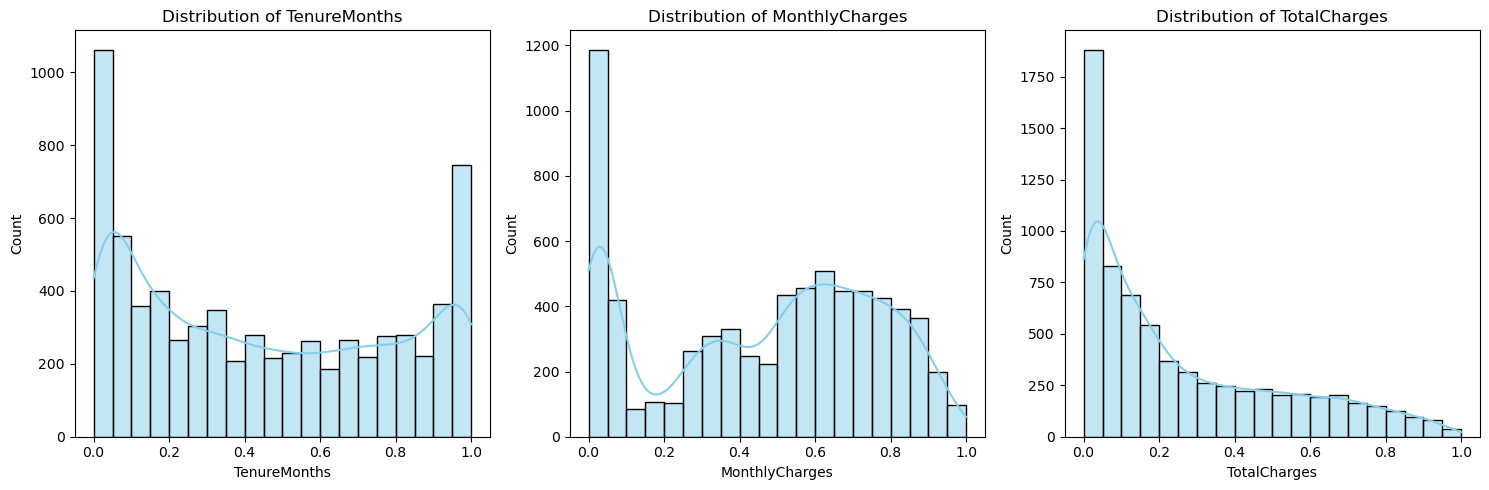





2. Visualizing Distributions of Categorical Features


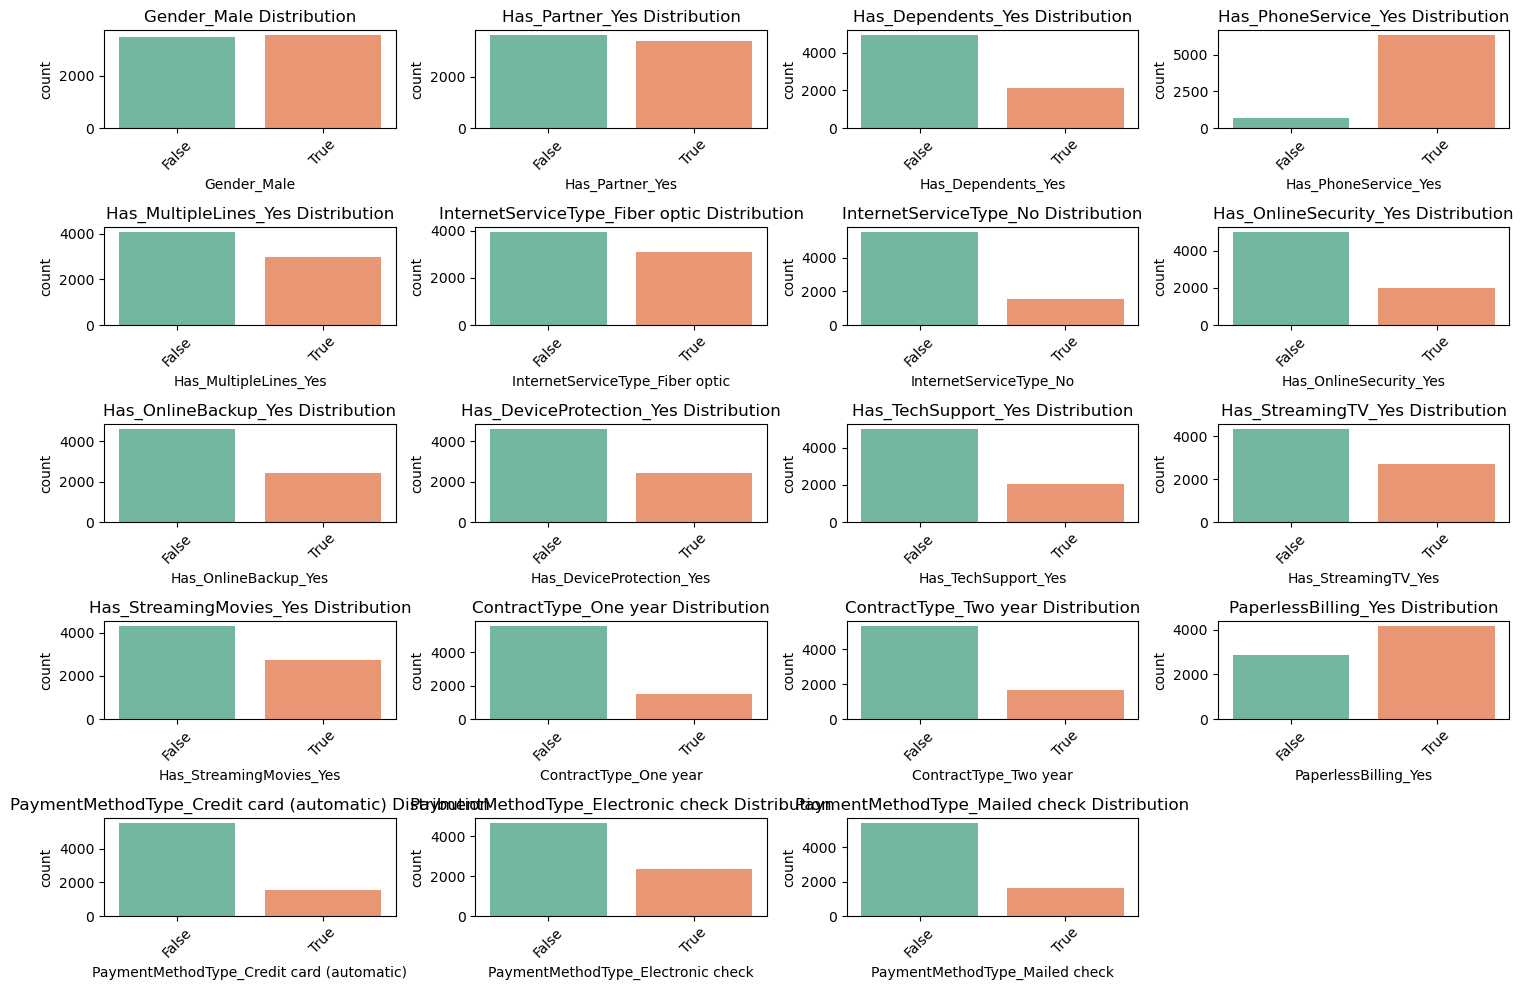





3. Analyzing the Relationship Between Features


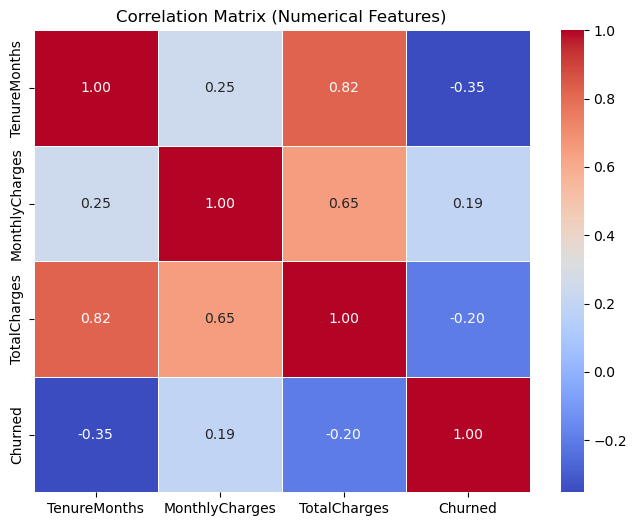





4. Pairplot to Analyze Relationships Among Numerical Features


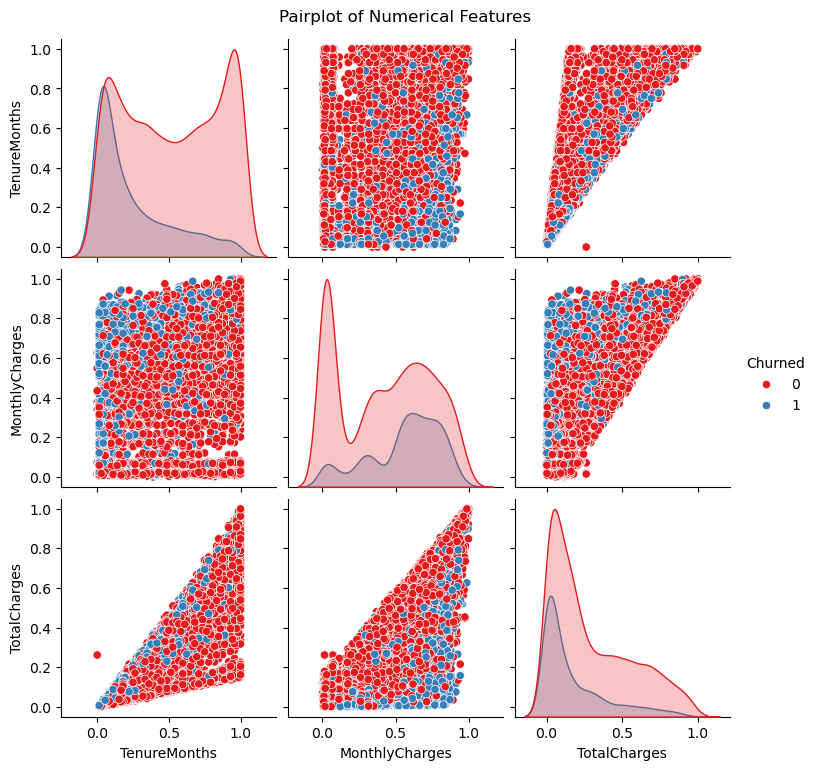





5. Class Imbalance Analysis for the Target Variable (Churned)


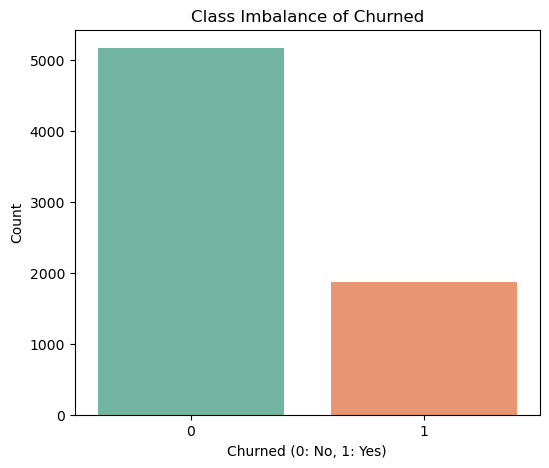

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualizing distributions of numerical features (TenureMonths, MonthlyCharges, TotalCharges)
def plot_numerical_features(data):
    print("1. Visualizing Distributions of Numerical Features")
    numerical_columns = ['TenureMonths', 'MonthlyCharges', 'TotalCharges']

    plt.figure(figsize=(15, 5))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(1, 3, i)
        sns.histplot(data[column], kde=True, color='skyblue', bins=20)
        plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

# 2. Visualizing distributions of categorical features (Gender, Has_Partner, etc.)
def plot_categorical_features(data):
    print("2. Visualizing Distributions of Categorical Features")
    categorical_columns = ['Gender_Male', 'Has_Partner_Yes', 'Has_Dependents_Yes',
                           'Has_PhoneService_Yes', 'Has_MultipleLines_Yes', 'InternetServiceType_Fiber optic',
                           'InternetServiceType_No', 'Has_OnlineSecurity_Yes', 'Has_OnlineBackup_Yes',
                           'Has_DeviceProtection_Yes', 'Has_TechSupport_Yes', 'Has_StreamingTV_Yes',
                           'Has_StreamingMovies_Yes', 'ContractType_One year', 'ContractType_Two year',
                           'PaperlessBilling_Yes', 'PaymentMethodType_Credit card (automatic)',
                           'PaymentMethodType_Electronic check', 'PaymentMethodType_Mailed check']

    plt.figure(figsize=(15, 10))
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(5, 4, i)
        sns.countplot(data=data, x=column, hue=column, palette='Set2', legend=False)
        plt.title(f'{column} Distribution')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Analyzing the relationship between features
def plot_correlations(data):
    print("3. Analyzing the Relationship Between Features")
    # Create a correlation matrix for numerical features
    corr = data[['TenureMonths', 'MonthlyCharges', 'TotalCharges', 'Churned']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix (Numerical Features)')
    plt.show()

# 4. Pairplot to analyze relationships among numerical features
def plot_pairplot(data):
    print("4. Pairplot to Analyze Relationships Among Numerical Features")
    sns.pairplot(data[['TenureMonths', 'MonthlyCharges', 'TotalCharges', 'Churned']], hue='Churned', palette='Set1')
    plt.suptitle('Pairplot of Numerical Features', y=1.02)
    plt.show()

# 5. Class imbalance analysis for the target variable (Churned)
def plot_class_imbalance(data):
    print("5. Class Imbalance Analysis for the Target Variable (Churned)")
    churn_counts = data['Churned'].value_counts()
    plt.figure(figsize=(6, 5))
    sns.barplot(x=churn_counts.index, y=churn_counts.values, hue=churn_counts.index, palette='Set2', legend=False)
    plt.title('Class Imbalance of Churned')
    plt.xlabel('Churned (0: No, 1: Yes)')
    plt.ylabel('Count')
    plt.show()

# Execute all the above functions for EDA with gaps
plot_numerical_features(data)
print("\n\n\n")  # Adding gap between sections

plot_categorical_features(data)
print("\n\n\n")  # Adding gap between sections

plot_correlations(data)
print("\n\n\n")  # Adding gap between sections

plot_pairplot(data)
print("\n\n\n")  # Adding gap between sections

plot_class_imbalance(data)


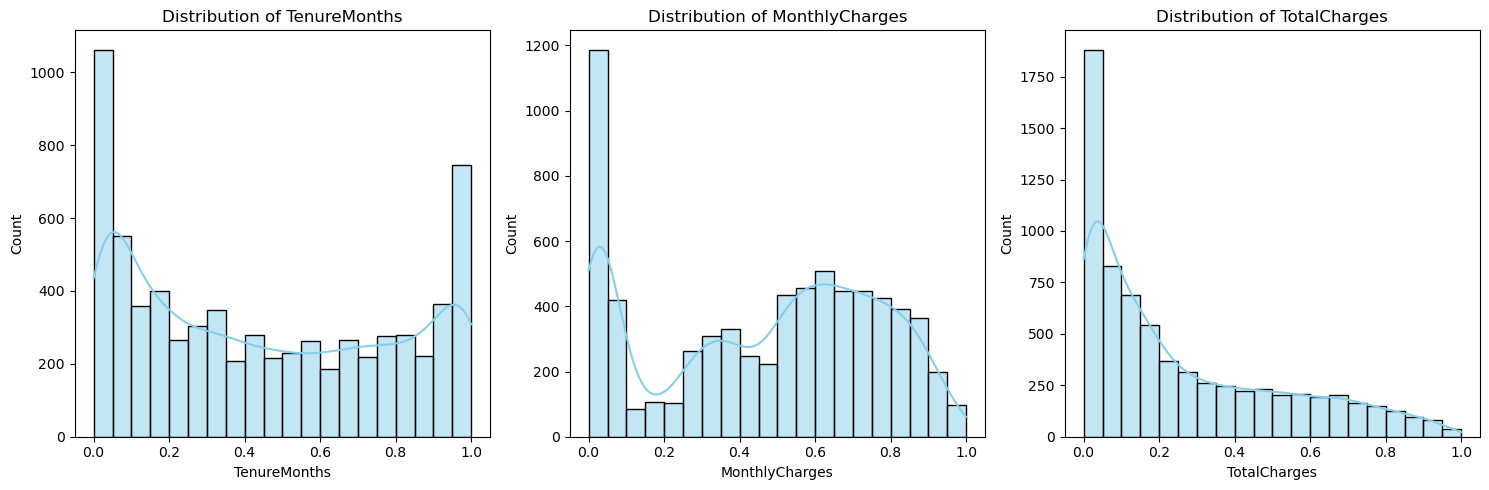


### Numerical Feature Descriptions ###

**TenureMonths**
- Mean: 0.44959928692003087
- Median: 0.40277777777777773
- Std Dev: 0.3411039030985351
- Min: 0.0
- Max: 1.0
- Skewness: 0.23948872998462187
- Kurtosis: -1.3872386910324281
- Observations: TenureMonths shows a right-skewed distribution.

**MonthlyCharges**
- Mean: 0.46280291005571317
- Median: 0.5184079601990049
- Std Dev: 0.29940345370824406
- Min: 0.0
- Max: 0.9999999999999999
- Skewness: -0.22047746443917662
- Kurtosis: -1.2572191009381857
- Observations: MonthlyCharges shows a left-skewed distribution.

**TotalCharges**
- Mean: 0.2613086130673743
- Median: 0.15944495730440802
- Std Dev: 0.26136628869182166
- Min: 0.0
- Max: 0.9999999999999999
- Skewness: 0.9621890426600143
- Kurtosis: -0.22815793917833815
- Observations: TotalCharges shows a right-skewed distribution.


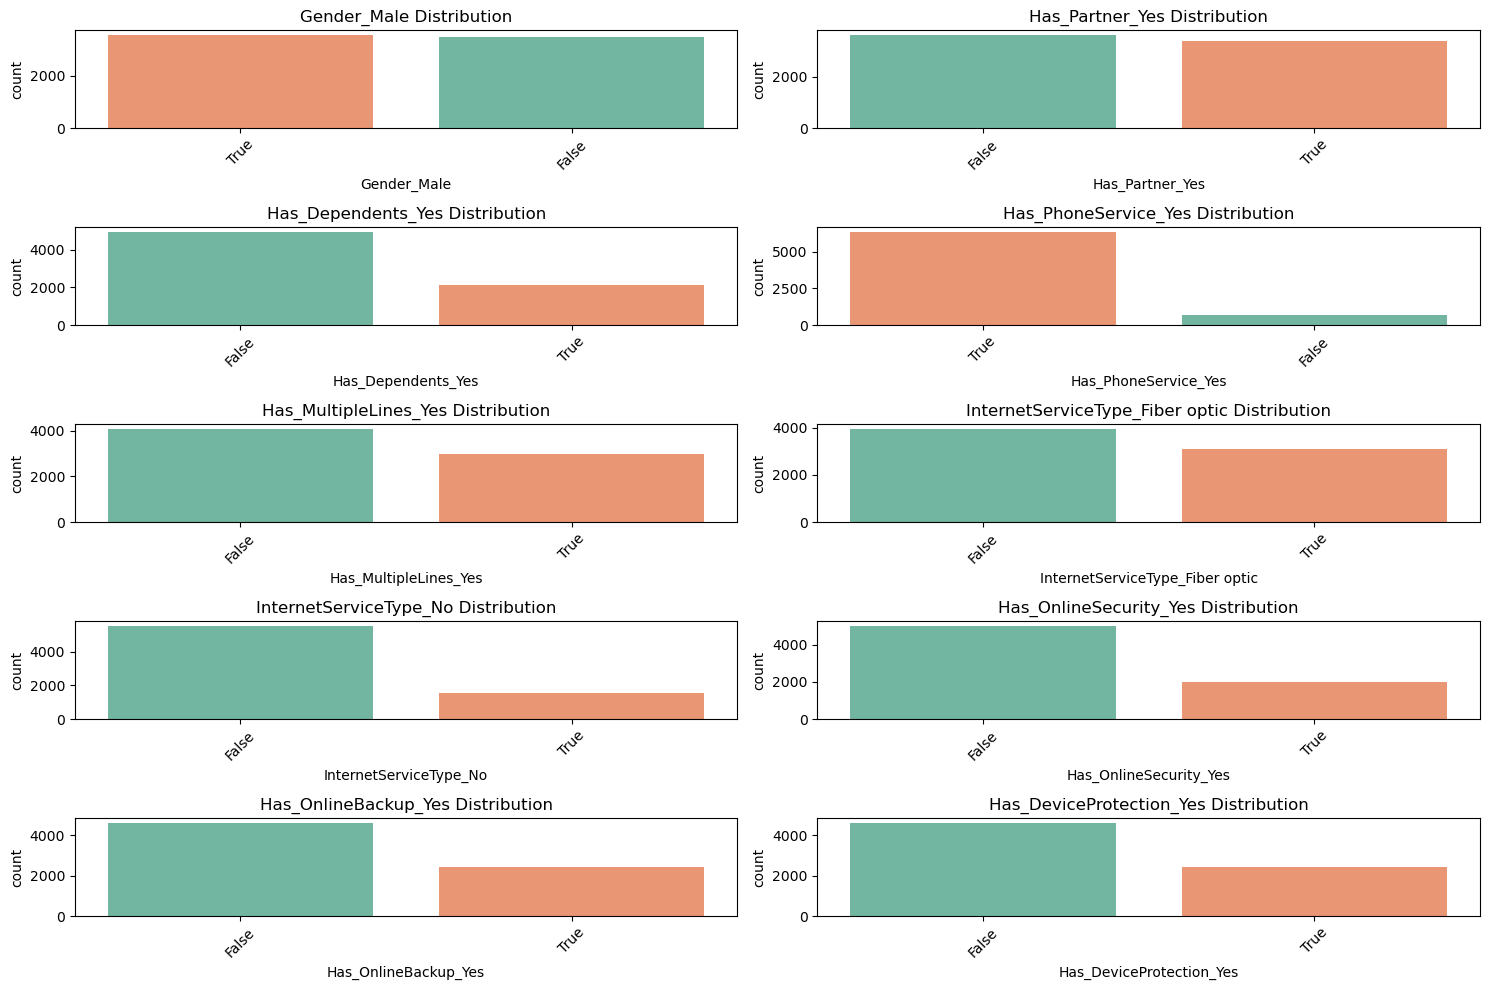


### Categorical Feature Descriptions ###

**Gender_Male**
- Unique Values: 2
- Most Common: True
- Most Common Count: 3555
- Distribution: {True: 3555, False: 3488}

**Has_Partner_Yes**
- Unique Values: 2
- Most Common: False
- Most Common Count: 3641
- Distribution: {False: 3641, True: 3402}

**Has_Dependents_Yes**
- Unique Values: 2
- Most Common: False
- Most Common Count: 4933
- Distribution: {False: 4933, True: 2110}

**Has_PhoneService_Yes**
- Unique Values: 2
- Most Common: True
- Most Common Count: 6361
- Distribution: {True: 6361, False: 682}

**Has_MultipleLines_Yes**
- Unique Values: 2
- Most Common: False
- Most Common Count: 4072
- Distribution: {False: 4072, True: 2971}

**InternetServiceType_Fiber optic**
- Unique Values: 2
- Most Common: False
- Most Common Count: 3947
- Distribution: {False: 3947, True: 3096}

**InternetServiceType_No**
- Unique Values: 2
- Most Common: False
- Most Common Count: 5517
- Distribution: {False: 5517, True: 1526}

**Has_OnlineSecurity_Yes

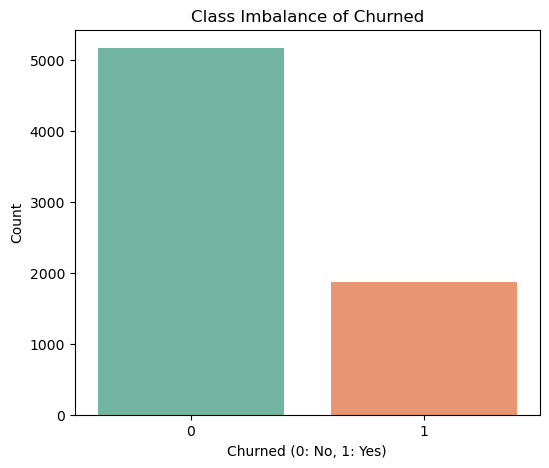


### Class Imbalance Description ###
Total Instances: 7043
Class 0 (No Churn): 5174 (73.46%)
Class 1 (Churn): 1869 (26.54%)


In [ ]:

from scipy.stats import skew, kurtosis

# Function to generate descriptions for numerical features
def describe_numerical_features(data):
    numerical_columns = ['TenureMonths', 'MonthlyCharges', 'TotalCharges']
    descriptions = {}
    for column in numerical_columns:
        col_data = data[column].dropna()  # Drop NaN values
        descriptions[column] = {
            'Mean': col_data.mean(),
            'Median': col_data.median(),
            'Std Dev': col_data.std(),
            'Min': col_data.min(),
            'Max': col_data.max(),
            'Skewness': skew(col_data, nan_policy="omit"),
            'Kurtosis': kurtosis(col_data, nan_policy="omit"),
            'Observations': f"{column} shows a {'left-skewed' if skew(col_data, nan_policy='omit') < 0 else 'right-skewed' if skew(col_data, nan_policy='omit') > 0 else 'symmetrical'} distribution."
        }
    return descriptions

# Plotting numerical features with automated descriptions
def plot_numerical_features_with_description(data):
    numerical_columns = ['TenureMonths', 'MonthlyCharges', 'TotalCharges']
    descriptions = describe_numerical_features(data)

    plt.figure(figsize=(15, 5))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(1, 3, i)
        sns.histplot(data[column].dropna(), kde=True, color='skyblue', bins=20)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    print("\n### Numerical Feature Descriptions ###")
    for column, stats in descriptions.items():
        print(f"\n**{column}**")
        for stat, value in stats.items():
            print(f"- {stat}: {value}")

# Function to describe categorical feature distributions
def describe_categorical_features(data, categorical_columns):
    descriptions = {}
    for column in categorical_columns:
        col_data = data[column].value_counts()
        descriptions[column] = {
            'Unique Values': len(col_data),
            'Most Common': col_data.idxmax(),
            'Most Common Count': col_data.max(),
            'Distribution': col_data.to_dict()
        }
    return descriptions

# Plotting categorical features with descriptions
def plot_categorical_features_with_description(data):
    categorical_columns = ['Gender_Male', 'Has_Partner_Yes', 'Has_Dependents_Yes',
                           'Has_PhoneService_Yes', 'Has_MultipleLines_Yes', 'InternetServiceType_Fiber optic',
                           'InternetServiceType_No', 'Has_OnlineSecurity_Yes', 'Has_OnlineBackup_Yes',
                           'Has_DeviceProtection_Yes', 'Has_TechSupport_Yes', 'Has_StreamingTV_Yes',
                           'Has_StreamingMovies_Yes', 'ContractType_One year', 'ContractType_Two year',
                           'PaperlessBilling_Yes', 'PaymentMethodType_Credit card (automatic)',
                           'PaymentMethodType_Electronic check', 'PaymentMethodType_Mailed check']

    descriptions = describe_categorical_features(data, categorical_columns)

    plt.figure(figsize=(15, 10))
    for i, column in enumerate(categorical_columns[:10], 1):  # Limit to first 10 for readability
        plt.subplot(5, 2, i)
        sns.countplot(data=data, x=column, palette='Set2', hue=column, legend=False,
                      order=data[column].value_counts().index)
        plt.title(f'{column} Distribution')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\n### Categorical Feature Descriptions ###")
    for column, stats in descriptions.items():
        print(f"\n**{column}**")
        for stat, value in stats.items():
            print(f"- {stat}: {value}")

# Class imbalance analysis with description
def plot_class_imbalance_with_description(data):
    churn_counts = data['Churned'].value_counts()
    plt.figure(figsize=(6, 5))
    sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Set2', hue=churn_counts.index, legend=False)
    plt.title('Class Imbalance of Churned')
    plt.xlabel('Churned (0: No, 1: Yes)')
    plt.ylabel('Count')
    plt.show()

    print("\n### Class Imbalance Description ###")
    print(f"Total Instances: {len(data)}")
    print(f"Class 0 (No Churn): {churn_counts[0]} ({(churn_counts[0] / len(data)) * 100:.2f}%)")
    print(f"Class 1 (Churn): {churn_counts[1]} ({(churn_counts[1] / len(data)) * 100:.2f}%)")

# Execute all the above functions
plot_numerical_features_with_description(data)
plot_categorical_features_with_description(data)
plot_class_imbalance_with_description(data)


In [ ]:
# STEP 4:

# FEATURE ENGINEERING

In [ ]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Now run your code

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_X_y



# Step 1: One-Hot Encoding for categorical features
categorical_columns = ['Gender_Male', 'Has_Partner_Yes', 'Has_Dependents_Yes',
                       'Has_PhoneService_Yes', 'Has_MultipleLines_Yes',
                       'InternetServiceType_Fiber optic', 'InternetServiceType_No',
                       'Has_OnlineSecurity_Yes', 'Has_OnlineBackup_Yes',
                       'Has_DeviceProtection_Yes', 'Has_TechSupport_Yes',
                       'Has_StreamingTV_Yes', 'Has_StreamingMovies_Yes',
                       'ContractType_One year', 'ContractType_Two year',
                       'PaperlessBilling_Yes', 'PaymentMethodType_Credit card (automatic)',
                       'PaymentMethodType_Electronic check', 'PaymentMethodType_Mailed check']

# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Step 2: Handle Missing Data (if any)
imputer = SimpleImputer(strategy='median')
data_encoded[['TenureMonths', 'MonthlyCharges', 'TotalCharges']] = imputer.fit_transform(data_encoded[['TenureMonths', 'MonthlyCharges', 'TotalCharges']])

# Step 3: Create new features
# 3.1. Tenure categories (Short-Term, Medium-Term, Long-Term)
data_encoded['TenureCategory'] = pd.cut(data_encoded['TenureMonths'], bins=[0, 12, 24, 100], labels=['Short-Term', 'Medium-Term', 'Long-Term'])

# 3.2. Monthly Charges categories (Low, Medium, High)
data_encoded['MonthlyChargesCategory'] = pd.cut(data_encoded['MonthlyCharges'], bins=[0, 50, 100, 200, 300], labels=['Low', 'Medium', 'High', 'Very High'])

# 3.3. Recode TenureCategories and MonthlyChargesCategory to one-hot encode them
data_encoded = pd.get_dummies(data_encoded, columns=['TenureCategory', 'MonthlyChargesCategory'], drop_first=True)

# Step 4: Handle Class Imbalance using SMOTE
X = data_encoded.drop('Churned', axis=1)  # Assuming 'Churned' is the target column
y = data_encoded['Churned']

# Manually validate data before using it
X, y = check_X_y(X, y)

# Applying SMOTE to balance the dataset (without using n_jobs)
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Removed n_jobs to avoid the warning
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shape of the resampled data
print(f"Resampled X shape: {X_resampled.shape}")
print(f"Resampled y shape: {y_resampled.shape}")

# Preview the transformed data
print(data_encoded.head())



Resampled X shape: (10348, 28)
Resampled y shape: (10348,)
   SeniorCitizen (0: No, 1: Yes)  TenureMonths  MonthlyCharges  TotalCharges  \
0                              0      0.013889        0.115423      0.001275   
1                              0      0.472222        0.385075      0.215867   
2                              0      0.027778        0.354229      0.010310   
3                              0      0.625000        0.239303      0.210241   
4                              0      0.027778        0.521891      0.015330   

   Churned  Gender_Male_True  Has_Partner_Yes_True  Has_Dependents_Yes_True  \
0        0             False                  True                    False   
1        0              True                 False                    False   
2        1              True                 False                    False   
3        0              True                 False                    False   
4        1             False                 False               

Before SMOTE - Class Distribution:
0    5174
1    1869
Name: count, dtype: int64

After SMOTE - Class Distribution:
0    5174
1    5174
Name: count, dtype: int64


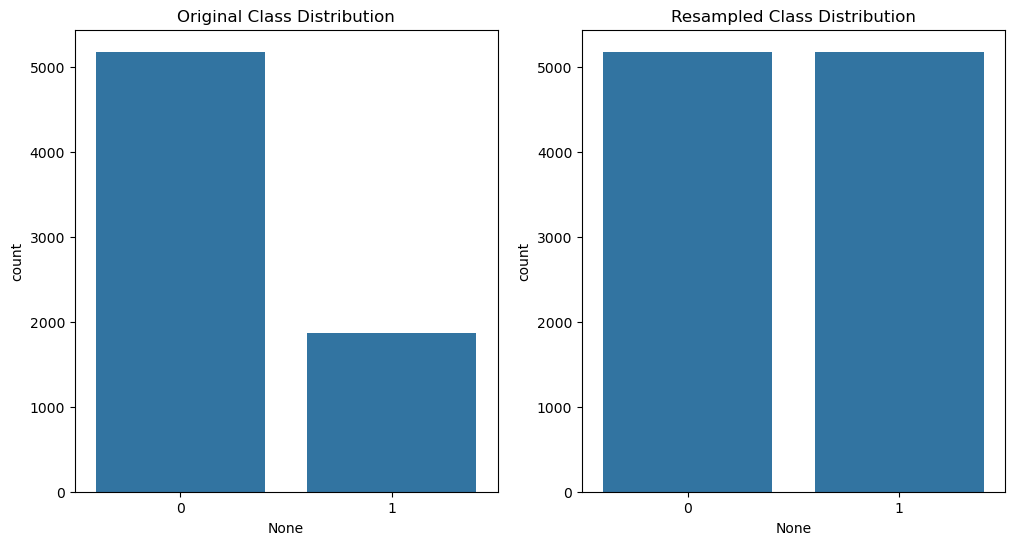

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert numpy array to pandas Series for proper value count
y_series = pd.Series(y)
y_resampled_series = pd.Series(y_resampled)

# Check the distribution of the target variable before and after SMOTE
print("Before SMOTE - Class Distribution:")
print(y_series.value_counts())

print("\nAfter SMOTE - Class Distribution:")
print(y_resampled_series.value_counts())

# Plotting the distribution of classes for both the original and resampled dataset
plt.figure(figsize=(12, 6))

# Original Class Distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_series)
plt.title('Original Class Distribution')

# Resampled Class Distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled_series)
plt.title('Resampled Class Distribution')

plt.show()


In [ ]:
# feature selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

# Assuming data_encoded is your DataFrame with feature engineering applied
# First, make sure that you have categorical columns to work with
X_categorical = data_encoded.select_dtypes(include=['object', 'category'])

# Check if there are any categorical columns available
if X_categorical.empty:
    print("No categorical columns found in the dataset!")
else:
    # Perform chi-square test only if categorical columns are available
    y = data_encoded['Churned']  # Assuming 'Churned' is the target column

    # Convert categorical columns to dummy variables
    X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)  # Convert to dummy variables, drop first to avoid multicollinearity

    # Perform chi-square test for feature selection
    chi2_selector = SelectKBest(score_func=chi2, k='all')
    chi2_selector.fit(X_categorical_encoded, y)

    # Display chi-square scores and p-values
    chi2_results = pd.DataFrame({
        'Feature': X_categorical_encoded.columns,
        'Chi2 Score': chi2_selector.scores_,
        'p-value': chi2_selector.pvalues_
    })

    # Filter out features with high p-value
    p_value_threshold = 0.05
    filtered_chi2 = chi2_results[chi2_results['p-value'] < p_value_threshold]

    # Update the data with only the selected features after chi-square filtering
    selected_features_chi2 = filtered_chi2['Feature'].tolist()
    data_filtered = data_encoded[selected_features_chi2 + ['Churned']]  # Assuming 'Churned' is the target column
    print("Selected features after chi-square filtering:", selected_features_chi2)



No categorical columns found in the dataset!


In [ ]:
print(data.columns)


Index(['SeniorCitizen (0: No, 1: Yes)', 'TenureMonths', 'MonthlyCharges',
       'TotalCharges', 'Churned', 'Gender_Male', 'Has_Partner_Yes',
       'Has_Dependents_Yes', 'Has_PhoneService_Yes', 'Has_MultipleLines_Yes',
       'InternetServiceType_Fiber optic', 'InternetServiceType_No',
       'Has_OnlineSecurity_Yes', 'Has_OnlineBackup_Yes',
       'Has_DeviceProtection_Yes', 'Has_TechSupport_Yes',
       'Has_StreamingTV_Yes', 'Has_StreamingMovies_Yes',
       'ContractType_One year', 'ContractType_Two year',
       'PaperlessBilling_Yes', 'PaymentMethodType_Credit card (automatic)',
       'PaymentMethodType_Electronic check', 'PaymentMethodType_Mailed check'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Fix feature names to match actual dataset
important_features = [
    "SeniorCitizen (0: No, 1: Yes)", "TenureMonths", "MonthlyCharges", "TotalCharges",
    "Has_OnlineSecurity_Yes", "Has_TechSupport_Yes", "PaperlessBilling_Yes",
    "ContractType_One year", "ContractType_Two year",  # To be merged
    "PaymentMethodType_Credit card (automatic)", "PaymentMethodType_Electronic check", "PaymentMethodType_Mailed check"  # To be merged
]

# Check if all features exist in the dataset
missing_features = [col for col in important_features if col not in data.columns]
if missing_features:
    print("Missing Features:", missing_features)
    raise KeyError("Some features are not found in the dataset. Update feature names!")

# Select only required features
X = data[important_features].copy()
y = data["Churned"]  # Target variable

# Convert empty strings to NaN
X.replace(" ", np.nan, inplace=True)

# Merge contract type into a single categorical feature
X["ContractType"] = X[["ContractType_One year", "ContractType_Two year"]].idxmax(axis=1)
X["ContractType"] = X["ContractType"].replace({
    "ContractType_One year": "One year",
    "ContractType_Two year": "Two Year"
}).fillna("Month-to-month")  # Default if neither is 1

# Merge payment method into a single categorical feature
X["PaymentMethodType"] = X[["PaymentMethodType_Credit card (automatic)", "PaymentMethodType_Electronic check", "PaymentMethodType_Mailed check"]].idxmax(axis=1)
X["PaymentMethodType"] = X["PaymentMethodType"].replace({
    "PaymentMethodType_Credit card (automatic)": "Credit Card",
    "PaymentMethodType_Electronic check": "Electronic Check",
    "PaymentMethodType_Mailed check": "Mailed Check"
}).fillna("Bank Transfer (automatic)")  # Default if none is 1

# Drop old one-hot encoded columns
X.drop(columns=["ContractType_One year", "ContractType_Two year",
                "PaymentMethodType_Credit card (automatic)",
                "PaymentMethodType_Electronic check",
                "PaymentMethodType_Mailed check"], inplace=True)

# Encode categorical variables
categorical_features = ["ContractType", "PaymentMethodType", "PaperlessBilling_Yes"]
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Convert numeric columns to float
X = X.apply(pd.to_numeric, errors="coerce")

# Handle missing values using median imputation
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform RFE for feature selection
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_scaled, y)

# Get selected features and print them in a clean format
selected_features_rfe = list(X_imputed.columns[rfe.support_])

# Print each selected feature on a new line for better readability
print("\nSelected Features:")
print("\n".join(selected_features_rfe))



Selected Features:
SeniorCitizen (0: No, 1: Yes)
TenureMonths
MonthlyCharges
TotalCharges
Has_OnlineSecurity_Yes
Has_TechSupport_Yes
PaperlessBilling_Yes
ContractType
PaymentMethodType


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=10 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(


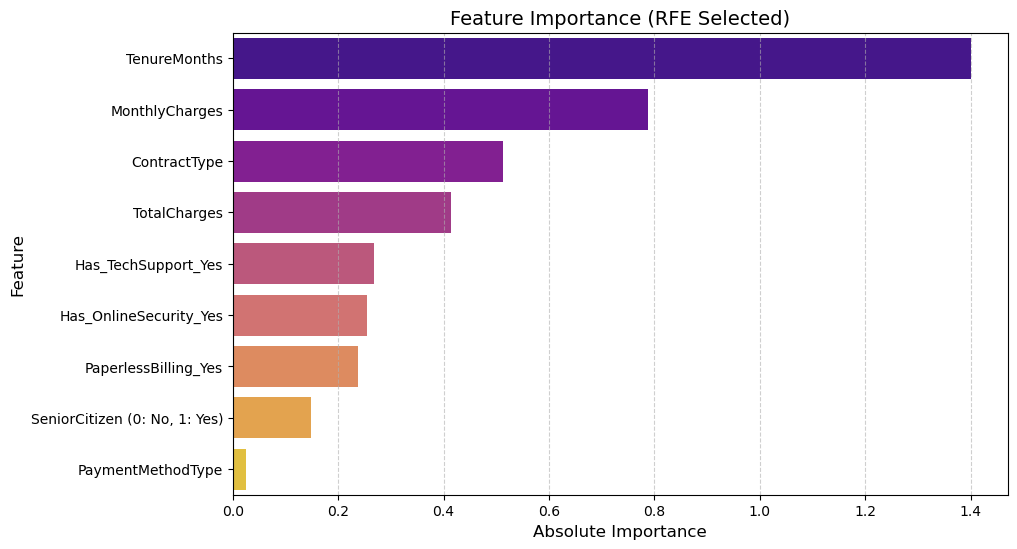

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Extract original feature names after imputation
feature_names = np.array(X_imputed.columns)

# Get the selected feature names from RFE
selected_feature_names = feature_names[rfe.support_]

# Check if the estimator has coefficients (for models like Logistic Regression)
if hasattr(rfe.estimator_, "coef_"):
    feature_importance_df = pd.DataFrame({
        "Feature": selected_feature_names,
        "Importance": np.abs(rfe.estimator_.coef_[0])  # Take absolute values
    }).sort_values(by="Importance", ascending=False)  # Sort by importance

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="plasma")
    plt.title("Feature Importance (RFE Selected)", fontsize=14)
    plt.xlabel("Absolute Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.show()
else:
    print("\nThe selected model does not have coefficients for feature importance.")


In [ ]:
# STEP 5:

# DATA SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split

# Ensure 'ContractType' and 'PaymentMethodType' are created properly
if {"ContractType_One year", "ContractType_Two year"}.issubset(data.columns):
    data["ContractType"] = data[["ContractType_One year", "ContractType_Two year"]].idxmax(axis=1)
    data["ContractType"] = data["ContractType"].replace({
        "ContractType_One year": "One year",
        "ContractType_Two year": "Two year"
    }).fillna("Month-to-month")

if {"PaymentMethodType_Credit card (automatic)", "PaymentMethodType_Electronic check",
    "PaymentMethodType_Mailed check"}.issubset(data.columns):
    data["PaymentMethodType"] = data[[
        "PaymentMethodType_Credit card (automatic)",
        "PaymentMethodType_Electronic check",
        "PaymentMethodType_Mailed check"
    ]].idxmax(axis=1)
    data["PaymentMethodType"] = data["PaymentMethodType"].replace({
        "PaymentMethodType_Credit card (automatic)": "Credit card",
        "PaymentMethodType_Electronic check": "Electronic check",
        "PaymentMethodType_Mailed check": "Mailed check"
    }).fillna("Bank transfer (automatic)")

# Updated selected features
selected_features = [
    "SeniorCitizen (0: No, 1: Yes)", "TenureMonths", "MonthlyCharges",
    "TotalCharges", "Has_OnlineSecurity_Yes", "Has_TechSupport_Yes",
    "PaperlessBilling_Yes", "ContractType", "PaymentMethodType"
]

# Check if all selected features exist in the dataset
missing_features = [col for col in selected_features if col not in data.columns]
if missing_features:
    raise KeyError(f"Missing Features in dataset: {missing_features}")

# Prepare feature set (X) and target variable (y)
X = data[selected_features]
y = data["Churned"]

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shape of the resulting splits
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Testing target set shape: {y_test.shape}")


Training feature set shape: (5634, 9)
Testing feature set shape: (1409, 9)
Training target set shape: (5634,)
Testing target set shape: (1409,)


In [ ]:
print(X_train.columns)

Index(['SeniorCitizen (0: No, 1: Yes)', 'TenureMonths', 'MonthlyCharges',
       'TotalCharges', 'Has_OnlineSecurity_Yes', 'Has_TechSupport_Yes',
       'PaperlessBilling_Yes', 'ContractType', 'PaymentMethodType'],
      dtype='object')


In [ ]:
# 1.LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Encode the target variable if it's categorical
target_col = "Churned"  # Changed from "Churn" to "Churned"
label_encoder = LabelEncoder()
data[target_col] = label_encoder.fit_transform(data[target_col])

# One-hot encode categorical features
data = pd.get_dummies(data, columns=[col for col in categorical_cols if col != target_col], drop_first=True)

# Split data into training and testing sets
X = data.drop(columns=[target_col])
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_train and X_test have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Fix any NaN values after alignment
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Save the model
joblib.dump(logistic_model, "logistic_regression_churn_model.pkl")

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, zero_division=1) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-Score: {f1:.2f}%")

print("Model saved as 'logistic_regression_churn_model.pkl'")


Accuracy: 82.26%
Precision: 69.16%
Recall: 59.52%
F1-Score: 63.98%
Model saved as 'logistic_regression_churn_model.pkl'


In [ ]:
# logistic regression from colab

In [ ]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Define the Logistic Regression model
log_reg = LogisticRegression()

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 300, 500]  # Increased max_iter values
}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the logistic regression model with the best hyperparameters
best_log_reg = LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=best_params['max_iter'])
best_log_reg.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = best_log_reg.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
precision = precision_score(y_test, y_pred) * 100  # Convert to percentage
recall = recall_score(y_test, y_pred) * 100  # Convert to percentage
f1 = f1_score(y_test, y_pred) * 100  # Convert to percentage

# Cross-validation score
cross_val_acc = cross_val_score(best_log_reg, X_train, y_train, cv=5, scoring='accuracy').mean() * 100  # Convert to percentage

# Print evaluation metrics
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")
print(f"Cross-Validation Accuracy: {cross_val_acc:.2f}%")

# Save the model
joblib.dump(best_log_reg, 'Logistic_Regression_Model.pkl')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

Best Hyperparameters: {'C': 10, 'max_iter': 200, 'solver': 'liblinear'}
Accuracy: 82.04%
Precision: 68.52%
Recall: 59.52%
F1 Score: 63.70%
Cross-Validation Accuracy: 80.21%


['Logistic_Regression_Model.pkl']

In [ ]:
# 2.XG BOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import joblib

# Ensure X_train and X_test are NumPy arrays or DataFrames
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])


# Ensure y_train and y_test are numeric
y_train = pd.Series(y_train).astype(int)
y_test = pd.Series(y_test).astype(int)

# Initialize XGBoost classifier
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, subsample=0.8, colsample_bytree=0.8)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Model Evaluation for Training Data
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
precision_train = precision_score(y_train, y_train_pred) * 100
recall_train = recall_score(y_train, y_train_pred) * 100
f1_train = f1_score(y_train, y_train_pred) * 100

# Model Evaluation for Testing Data
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
precision_test = precision_score(y_test, y_test_pred) * 100
recall_test = recall_score(y_test, y_test_pred) * 100
f1_test = f1_score(y_test, y_test_pred) * 100

print(f"Testing Accuracy: {accuracy_test:.2f}%")
print(f"Testing Precision: {precision_test:.2f}%")
print(f"Testing Recall: {recall_test:.2f}%")
print(f"Testing F1 Score: {f1_test:.2f}%")

# Save the model using joblib
joblib.dump(xgb, 'xgboost_churn_model.pkl')


Testing Accuracy: 80.13%
Testing Precision: 68.36%
Testing Recall: 46.79%
Testing F1 Score: 55.56%


['xgboost_churn_model.pkl']

In [ ]:
# 3.RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
import joblib

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees
    'max_depth': [10, 20, 30, None],       # Depth of trees
    'min_samples_split': [2, 5, 10],       # Min samples required to split
    'min_samples_leaf': [1, 2, 4],         # Min samples required at leaf
    'bootstrap': [True, False]             # Bootstrap sampling
}

# Randomized Search for best hyperparameters
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model after tuning
best_rf_model = random_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

# Print results
print(f"Random Forest Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-Score: {f1:.2f}%")

# Save the model with the required format
model_filename = "randomforest_churn_model.pkl"
joblib.dump(best_rf_model, model_filename)
print(f"Model saved as {model_filename}")


Random Forest Accuracy: 78.99%
Precision: 65.12%
Recall: 44.92%
F1-Score: 53.16%
Model saved as randomforest_churn_model.pkl


In [ ]:
# 4.NAIVE BAYES

In [ ]:
# Import required libraries
from sklearn.naive_bayes import GaussianNB  # For continuous data (Gaussian Naive Bayes)
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Initialize Naive Bayes model
naive_bayes = GaussianNB()

# Train the model on training data
naive_bayes.fit(X_train, y_train)

# Predict on the test data
y_pred = naive_bayes.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
precision = precision_score(y_test, y_pred) * 100  # Convert to percentage
recall = recall_score(y_test, y_pred) * 100  # Convert to percentage
f1 = f1_score(y_test, y_pred) * 100  # Convert to percentage

# Cross-validation score
cross_val_acc = cross_val_score(naive_bayes, X_train, y_train, cv=5, scoring='accuracy').mean() * 100  # Convert to percentage

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")
print(f"Cross-Validation Accuracy: {cross_val_acc:.2f}%")

# Save the model using joblib
joblib.dump(naive_bayes, 'naive_bayes_model.pkl')


Accuracy: 78.14%
Precision: 59.94%
Recall: 53.21%
F1 Score: 56.37%
Cross-Validation Accuracy: 77.44%


['naive_bayes_model.pkl']

In [ ]:
# 5.KNN

In [ ]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Assuming X_train, X_test, y_train, y_test are already defined (train-test split has been done)

# Initialize the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()

# Define hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters: ", best_params)

# Train the KNN model with the best hyperparameters
best_knn_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                      weights=best_params['weights'],
                                      metric=best_params['metric'])
best_knn_model.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = best_knn_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
precision = precision_score(y_test, y_pred) * 100  # Convert to percentage
recall = recall_score(y_test, y_pred) * 100  # Convert to percentage
f1 = f1_score(y_test, y_pred) * 100  # Convert to percentage

# Cross-validation score
cross_val_acc = cross_val_score(best_knn_model, X_train, y_train, cv=5, scoring='accuracy').mean() * 100  # Convert to percentage

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")
print(f"Cross-Validation Accuracy: {cross_val_acc:.2f}%")

# Save the model using joblib
joblib.dump(best_knn_model, 'knn_model.pkl')


Best Hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 78.92%
Precision: 63.14%
Recall: 49.47%
F1 Score: 55.47%
Cross-Validation Accuracy: 78.49%


['knn_model.pkl']

In [ ]:
# 6.NEURAL NETWORKS

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import joblib

# Assuming X_train, X_test, y_train, y_test are already defined (train-test split has been done)

# Function to create a more advanced neural network model
def create_advanced_model(input_dim):
    model = Sequential()

    # First hidden layer
    model.add(Dense(128, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.001)))  # L2 regularization
    model.add(BatchNormalization())  # Batch Normalization before activation
    model.add(Dropout(0.3))  # Dropout to prevent overfitting

    # Second hidden layer
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization
    model.add(BatchNormalization())  # Batch Normalization before activation
    model.add(Dropout(0.3))  # Dropout to prevent overfitting

    # Third hidden layer
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization
    model.add(BatchNormalization())  # Batch Normalization before activation
    model.add(Dropout(0.3))  # Dropout to prevent overfitting

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    return model

# Compile the model with Adam optimizer and a reduced learning rate
def compile_model(model):
    optimizer = Adam(learning_rate=0.0005)  # Lower learning rate for better convergence
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and compile the model
input_dim = X_train.shape[1]
model = create_advanced_model(input_dim)
model = compile_model(model)

# Early stopping and learning rate reduction on plateau (both strategies for better convergence)
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model (ensure it runs up to 200 epochs)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32,
                    callbacks=[early_stopping, lr_reduction])

# Evaluate the model on test data
y_test_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision = precision_score(y_test, y_test_pred) * 100
recall = recall_score(y_test, y_test_pred) * 100
f1 = f1_score(y_test, y_test_pred) * 100

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Save the model in the native Keras format
model.save('neuralnetwork_churn_model.keras')  # Save in Keras format instead of HDF5

# Optionally, save training history for analysis
joblib.dump(history.history, 'history.pkl')


C:\Users\littl\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6404 - loss: 0.8321 - val_accuracy: 0.7346 - val_loss: 0.6826 - learning_rate: 5.0000e-04
Epoch 2/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7340 - loss: 0.6707 - val_accuracy: 0.7346 - val_loss: 0.6449 - learning_rate: 5.0000e-04
Epoch 3/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7400 - loss: 0.6381 - val_accuracy: 0.7644 - val_loss: 0.5810 - learning_rate: 5.0000e-04
Epoch 4/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7676 - loss: 0.6014 - val_accuracy: 0.7899 - val_loss: 0.5509 - learning_rate: 5.0000e-04
Epoch 5/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7752 - loss: 0.5879 - val_accuracy: 0.7899 - val_loss: 0.5369 - learning_rate: 5.0000e-04
Epoch 6/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7678 - loss: 0.5849 - val_accuracy: 0.7899 - val_loss: 0.5344 - learning_rate: 5.0000e-04
Epoch 7/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc

['history.pkl']

In [ ]:
# 7.ELASTIC NET

In [ ]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Assuming X_train, X_test, y_train, y_test are already defined (train-test split has been done)

# Initialize the ElasticNet Logistic Regression model
elastic_net_model = LogisticRegression(penalty='elasticnet', solver='saga', random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 1]  # Mix of L1 (Lasso) and L2 (Ridge) penalties
}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters: ", best_params)

# Train the ElasticNet Logistic Regression model with the best hyperparameters
best_elastic_net_model = LogisticRegression(penalty='elasticnet', solver='saga',
                                            C=best_params['C'], l1_ratio=best_params['l1_ratio'],
                                            random_state=42)
best_elastic_net_model.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = best_elastic_net_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
precision = precision_score(y_test, y_pred) * 100  # Convert to percentage
recall = recall_score(y_test, y_pred) * 100  # Convert to percentage
f1 = f1_score(y_test, y_pred) * 100  # Convert to percentage

# Cross-validation score
cross_val_acc = cross_val_score(best_elastic_net_model, X_train, y_train, cv=5, scoring='accuracy').mean() * 100  # Convert to percentage

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")
print(f"Cross-Validation Accuracy: {cross_val_acc:.2f}%")

# Save the model using joblib
joblib.dump(best_elastic_net_model, 'elastic_net_logistic_model.pkl')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................C=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ................................C=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ................................C=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ................................C=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ................................C=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ................................C=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ................................C=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ................................C=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ................................C=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ................................C=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ................................C=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ................................C=0.1, 

['elastic_net_logistic_model.pkl']

In [ ]:
# 8.STACKING CLASSIFIER

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize base models with optimized hyperparameters
random_forest = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42)
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, random_state=42)
xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=10, random_state=42)
lgbm = LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=10, random_state=42)
catboost = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, random_state=42, verbose=0)

# Create Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[
        ('rf', random_forest),
        ('gb', gb),
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('cat', catboost)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True
)

# Train the Stacking Classifier
stacking_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = stacking_classifier.predict(X_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

# Cross-validation score
cross_val_acc = cross_val_score(stacking_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy').mean() * 100

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")
print(f"Cross-Validation Accuracy: {cross_val_acc:.2f}%")

# Save the model using joblib
joblib.dump(stacking_classifier, 'stacking_classifier_model.pkl')


[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

['stacking_classifier_model.pkl']

In [ ]:
# AGAIN LOGISTIC REGRESSION WITH 9 FEATURES

In [ ]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")


In [ ]:
X = X.fillna(X.median(numeric_only=True))


In [ ]:
import pandas as pd

# Load data
data = pd.read_csv(r"S:\implementation\TelecomChurnInsights.csv")  # Replace with your actual dataset file

# Display column names
print(data.columns)


Index(['CustomerID', 'Gender', 'SeniorCitizen (0: No, 1: Yes)', 'Has_Partner',
       'Has_Dependents', 'TenureMonths', 'Has_PhoneService',
       'Has_MultipleLines', 'InternetServiceType', 'Has_OnlineSecurity',
       'Has_OnlineBackup', 'Has_DeviceProtection', 'Has_TechSupport',
       'Has_StreamingTV', 'Has_StreamingMovies', 'ContractType',
       'PaperlessBilling', 'PaymentMethodType', 'MonthlyCharges',
       'TotalCharges', 'Churned'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
data = pd.read_csv(r"S:\implementation\TelecomChurnInsights.csv")  # Replace with your actual dataset file

# Define required features
selected_features = [
    "SeniorCitizen (0: No, 1: Yes)", "TenureMonths", "MonthlyCharges", "TotalCharges",
    "Has_OnlineSecurity", "Has_TechSupport", "PaperlessBilling",
    "ContractType", "PaymentMethodType"
]

# Encode target variable
target_col = "Churned"
data[target_col] = data[target_col].map({"No": 0, "Yes": 1})  # Adjust mapping if needed

# Filter required features
X = data[selected_features]
y = data[target_col]

# Identify categorical and numerical columns
categorical_cols = ["ContractType", "PaymentMethodType"]
numerical_cols = [col for col in selected_features if col not in categorical_cols]

# Define ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_cols)
])

# Create pipeline with Logistic Regression
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Save model and transformer
joblib.dump(pipeline, "logistic_regression_churn_model_9features.pkl")

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-Score: {f1:.2f}%")

print("Updated model saved as 'logistic_regression_churn_model_9features.pkl'")


ValueError: could not convert string to float: ' '

In [ ]:
print(X_train.shape, X_test.shape)
print(X.columns)
print(X.isnull().sum())
print(type(X))


(5634, 9) (1409, 9)
Index(['SeniorCitizen (0: No, 1: Yes)', 'TenureMonths', 'MonthlyCharges',
       'TotalCharges', 'Has_OnlineSecurity', 'Has_TechSupport',
       'PaperlessBilling', 'ContractType', 'PaymentMethodType'],
      dtype='object')
SeniorCitizen (0: No, 1: Yes)    0
TenureMonths                     0
MonthlyCharges                   0
TotalCharges                     0
Has_OnlineSecurity               0
Has_TechSupport                  0
PaperlessBilling                 0
ContractType                     0
PaymentMethodType                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 4alogirthms together(lr,rf,gb,xgboost)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ['ContractType', 'PaymentMethodType', 'Has_OnlineSecurity', 'Has_TechSupport', 'PaperlessBilling']

# Encode categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Ensure all data is numeric
X_train = X_train.astype(float)
X_test = X_test.astype(float)


In [ ]:
# Check unique values in target variable
print(y_train.unique())

# Convert target variable to numeric (if not already)
y_train = y_train.replace({'No': 0, 'Yes': 1}).astype(int)
y_test = y_test.replace({'No': 0, 'Yes': 1}).astype(int)

# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
print(y_train.unique(), y_test.unique())

[0 1]
[0 1] [0 1]


In [ ]:
# Find columns with non-numeric values
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns in X_train:", non_numeric_cols.tolist())

# Check unique values in these columns
for col in non_numeric_cols:
    print(f"Unique values in {col}: {X_train[col].unique()}")


Non-numeric columns in X_train: ['Has_OnlineSecurity', 'Has_TechSupport', 'PaperlessBilling', 'ContractType', 'PaymentMethodType']
Unique values in Has_OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in Has_TechSupport: ['No' 'Yes' 'No internet service']
Unique values in PaperlessBilling: ['No' 'Yes']
Unique values in ContractType: ['Month-to-month' 'Two year' 'One year']
Unique values in PaymentMethodType: ['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in non_numeric_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])



In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in non_numeric_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Binary categorical columns (map manually)
binary_cols = ['Has_OnlineSecurity', 'Has_TechSupport', 'PaperlessBilling']
for col in binary_cols:
    X_train[col] = X_train[col].replace({'No': 0, 'Yes': 1, 'No internet service': 0}).astype(int)
    X_test[col] = X_test[col].replace({'No': 0, 'Yes': 1, 'No internet service': 0}).astype(int)

# Multi-class categorical columns (use LabelEncoder)
multi_class_cols = ['ContractType', 'PaymentMethodType']
encoder = LabelEncoder()
for col in multi_class_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Ensure all values are numeric now
print(X_train.dtypes)
print(X_test.dtypes)


SeniorCitizen (0: No, 1: Yes)      int64
TenureMonths                     float64
MonthlyCharges                   float64
TotalCharges                     float64
Has_OnlineSecurity                 int32
Has_TechSupport                    int32
PaperlessBilling                   int32
ContractType                       int64
PaymentMethodType                  int64
dtype: object
SeniorCitizen (0: No, 1: Yes)      int64
TenureMonths                     float64
MonthlyCharges                   float64
TotalCharges                     float64
Has_OnlineSecurity                 int32
Has_TechSupport                    int32
PaperlessBilling                   int32
ContractType                       int64
PaymentMethodType                  int64
dtype: object


In [ ]:
print(df.columns.tolist())


['CustomerID', 'Gender', 'SeniorCitizen (0: No, 1: Yes)', 'Has_Partner', 'Has_Dependents', 'TenureMonths', 'Has_PhoneService', 'Has_MultipleLines', 'InternetServiceType', 'Has_OnlineSecurity', 'Has_OnlineBackup', 'Has_DeviceProtection', 'Has_TechSupport', 'Has_StreamingTV', 'Has_StreamingMovies', 'ContractType', 'PaperlessBilling', 'PaymentMethodType', 'MonthlyCharges', 'TotalCharges', 'Churned']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = ['Has_OnlineSecurity', 'Has_TechSupport', 'PaperlessBilling', 'ContractType', 'PaymentMethodType']

# Apply label encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders if needed later

# Convert target variable ('Churned') to numeric if it's not already
df['Churned'] = df['Churned'].map({'No': 0, 'Yes': 1})  # Ensure binary format


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load dataset (ensure df is preprocessed correctly)
selected_features = [
    'SeniorCitizen (0: No, 1: Yes)', 'TenureMonths', 'MonthlyCharges',
    'TotalCharges', 'Has_OnlineSecurity', 'Has_TechSupport',
    'PaperlessBilling', 'ContractType', 'PaymentMethodType'
]

X = df[selected_features]  # Ensure df is the cleaned dataset
y = df['Churned']  # Ensure 'Churn' column is properly encoded as 0 or 1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features separately
scaler = StandardScaler()
num_features = ['TenureMonths', 'MonthlyCharges', 'TotalCharges']
X_train[num_features] = scaler.fit_transform(X_train[num_features].values)
X_test[num_features] = scaler.transform(X_test[num_features].values)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=500, solver='lbfgs'),
    "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss')
}

best_model = None
best_accuracy = 0

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

# Save the best model
joblib.dump(best_model, f"best_model_{best_model_name}.pkl")
joblib.dump(scaler, "scaler.pkl")

print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy * 100:.2f}%")


Best Model: LogisticRegression with Accuracy: 79.84%


In [ ]:
# trying for above 79

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load dataset (ensure df is preprocessed correctly)
selected_features = [
    'SeniorCitizen (0: No, 1: Yes)', 'TenureMonths', 'MonthlyCharges',
    'TotalCharges', 'Has_OnlineSecurity', 'Has_TechSupport',
    'PaperlessBilling', 'ContractType', 'PaymentMethodType'
]

# Drop rows with missing target values
df = df.dropna(subset=['Churned'])

X = df[selected_features]
y = df['Churned']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features separately
scaler = StandardScaler()
num_features = ['TenureMonths', 'MonthlyCharges', 'TotalCharges']
X_train[num_features] = scaler.fit_transform(X_train[num_features].values)
X_test[num_features] = scaler.transform(X_test[num_features].values)

# Define models with optimized hyperparameters
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, solver='lbfgs', C=0.5),
    "RandomForest": RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=5, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42, eval_metric='logloss')
}

best_model = None
best_accuracy = 0

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

# Save the best model
joblib.dump(best_model, f"best_model_{best_model_name}.pkl")
joblib.dump(scaler, "after79.pkl")

print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy * 100:.2f}%")


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.